In [1]:
import numpy as np
import re
import json
import matplotlib.pyplot as plt

In [2]:
def is_correct(a,b,sum):
    return a+b == sum

def get_num_digits(num):
    return len(str(num).replace('-',''))

In [3]:
# first process all the lines and get a list of processed lines
processed_lines= []

with open('gemini_response/diff_ord_int_addition_response.txt','r') as file:
    for line in file:
        # remove leading and trailing spaces
        line = line.strip()
        # if line is empty, skip it
        if line == '':
            continue
        processed_lines.append(line)

print('Number of processed lines:', len(processed_lines))

Number of processed lines: 8400


**we got response for all of 8400 lines.**

In [4]:
BIGNUM_DIGIT_START = 4
BIGNUM_DIGIT_END = 10
SMALL_NUM_MAX_DIGIT = 3

total = np.zeros((4,SMALL_NUM_MAX_DIGIT,BIGNUM_DIGIT_END-BIGNUM_DIGIT_START+1))
correct = np.zeros((4,SMALL_NUM_MAX_DIGIT,BIGNUM_DIGIT_END-BIGNUM_DIGIT_START+1))
# axis 0: 0 both pos, 1: bignum pos smallnum neg, 2: bignum neg smallnum pos, 3: both neg
# axis 1: small num digits -1
# axis 2: bignum digits -4

for line in processed_lines:
    # format is a+b=sum, split into ab sum
    a_b, sum = line.split('=')

    # split a and b
    a,b = a_b.split('+')

    # convert to int
    a = int(a)
    b = int(b)
    sum = int(sum)

    # get number of digits
    smallnum = a if get_num_digits(a) <= SMALL_NUM_MAX_DIGIT else b
    bignum = a if get_num_digits(a) > SMALL_NUM_MAX_DIGIT else b

    # get number of digits
    smallnum_digits = get_num_digits(smallnum)
    bignum_digits = get_num_digits(bignum)

    # get sign
    smallnum_sign = 1 if smallnum < 0 else 0 # 0 for positive, 1 for negative
    bignum_sign = 1 if bignum < 0 else 0 # 0 for positive, 1 for negative

    both_sign = smallnum_sign + 2* bignum_sign

    # get index
    smallnum_digits_index = smallnum_digits-1
    bignum_digits_index = bignum_digits-BIGNUM_DIGIT_START

    total[both_sign][smallnum_digits_index][bignum_digits_index] += 1
    correct[both_sign][smallnum_digits_index][bignum_digits_index] += is_correct(a,b,sum)



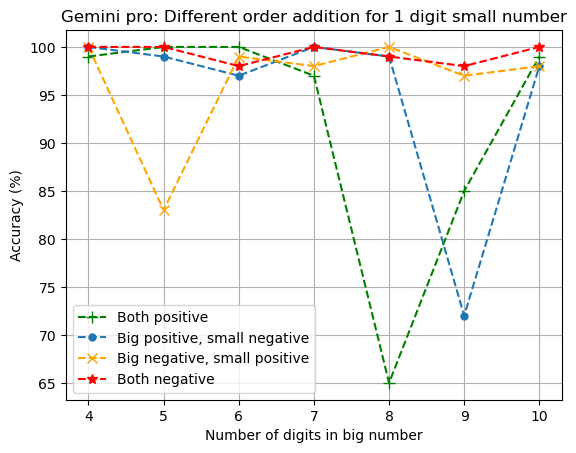

In [5]:
accuracy = correct*100/total
big_digits = np.arange(BIGNUM_DIGIT_START,BIGNUM_DIGIT_END+1)

# plot accuracy as a function of number of digits when small number is 1 digit
plt.plot(big_digits,accuracy[0][0],marker='+',ms=8,linestyle='--',color='green',label='Both positive')
plt.plot(big_digits,accuracy[1][0],marker='o',ms=5,linestyle='--',color='#1f77b4',label='Big positive, small negative')
plt.plot(big_digits,accuracy[2][0],marker='x',ms=7,linestyle='--',color='orange',label='Big negative, small positive')
plt.plot(big_digits,accuracy[3][0],marker='*',ms=7,linestyle='--',color='red',label='Both negative')
plt.xlabel('Number of digits in big number')
plt.ylabel('Accuracy (%)')
plt.title('Gemini pro: Different order addition for 1 digit small number')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/diff_ord_int_addition_1_digit_small.png')
plt.show()

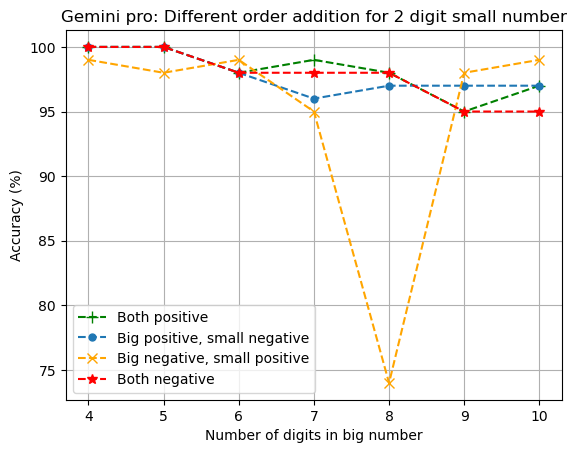

In [6]:
# plot accuracy as a function of number of digits when small number is 2 digit
plt.plot(big_digits,accuracy[0][1],marker='+',ms=8,linestyle='--',color='green',label='Both positive')
plt.plot(big_digits,accuracy[1][1],marker='o',ms=5,linestyle='--',color='#1f77b4',label='Big positive, small negative')
plt.plot(big_digits,accuracy[2][1],marker='x',ms=7,linestyle='--',color='orange',label='Big negative, small positive')
plt.plot(big_digits,accuracy[3][1],marker='*',ms=7,linestyle='--',color='red',label='Both negative')
plt.xlabel('Number of digits in big number')
plt.ylabel('Accuracy (%)')
plt.title('Gemini pro: Different order addition for 2 digit small number')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/diff_ord_int_addition_2_digit_small.png')
plt.show()

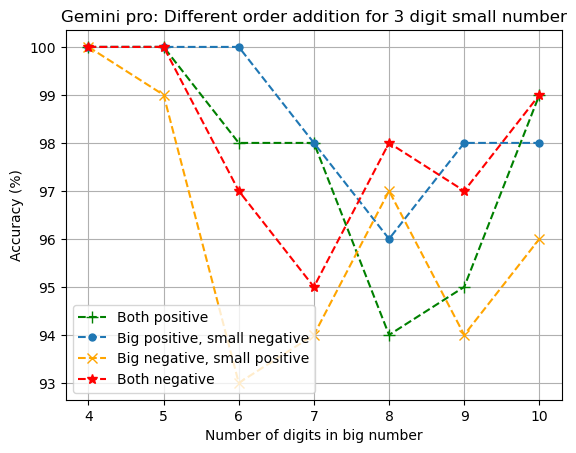

In [7]:
# plot accuracy as a function of number of digits when small number is 3 digit
plt.plot(big_digits,accuracy[0][2],marker='+',ms=8,linestyle='--',color='green',label='Both positive')
plt.plot(big_digits,accuracy[1][2],marker='o',ms=5,linestyle='--',color='#1f77b4',label='Big positive, small negative')
plt.plot(big_digits,accuracy[2][2],marker='x',ms=7,linestyle='--',color='orange',label='Big negative, small positive')
plt.plot(big_digits,accuracy[3][2],marker='*',ms=7,linestyle='--',color='red',label='Both negative')
plt.xlabel('Number of digits in big number')
plt.ylabel('Accuracy (%)')
plt.title('Gemini pro: Different order addition for 3 digit small number')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/diff_ord_int_addition_3_digit_small.png')
plt.show()

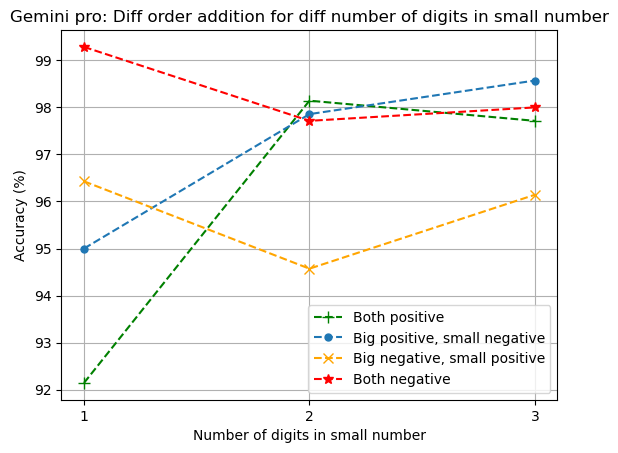

In [8]:
# plot average accuracy as a function of number of digits in small number
avg_accuracy_per_small_num_digits = np.mean(accuracy,axis=2)
small_num_digits = np.arange(1,SMALL_NUM_MAX_DIGIT+1)
plt.plot(small_num_digits,avg_accuracy_per_small_num_digits[0],marker='+',ms=8,linestyle='--',color='green',label='Both positive')
plt.plot(small_num_digits,avg_accuracy_per_small_num_digits[1],marker='o',ms=5,linestyle='--',color='#1f77b4',label='Big positive, small negative')
plt.plot(small_num_digits,avg_accuracy_per_small_num_digits[2],marker='x',ms=7,linestyle='--',color='orange',label='Big negative, small positive')
plt.plot(small_num_digits,avg_accuracy_per_small_num_digits[3],marker='*',ms=7,linestyle='--',color='red',label='Both negative')
plt.xticks(small_num_digits)
plt.xlabel('Number of digits in small number')
plt.ylabel('Accuracy (%)')
plt.title('Gemini pro: Diff order addition for diff number of digits in small number')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/diff_ord_int_addition_small_num_digits.png')
plt.show()

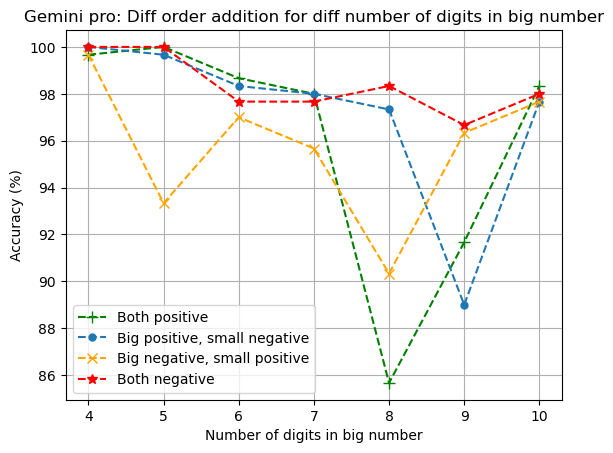

In [9]:
# plot average accuracy as a function of number of digits in big number
avg_accuracy_per_big_num_digits = np.mean(accuracy,axis=1)
big_num_digits = np.arange(BIGNUM_DIGIT_START,BIGNUM_DIGIT_END+1)
plt.plot(big_num_digits,avg_accuracy_per_big_num_digits[0],marker='+',ms=8,linestyle='--',color='green',label='Both positive')
plt.plot(big_num_digits,avg_accuracy_per_big_num_digits[1],marker='o',ms=5,linestyle='--',color='#1f77b4',label='Big positive, small negative')
plt.plot(big_num_digits,avg_accuracy_per_big_num_digits[2],marker='x',ms=7,linestyle='--',color='orange',label='Big negative, small positive')
plt.plot(big_num_digits,avg_accuracy_per_big_num_digits[3],marker='*',ms=7,linestyle='--',color='red',label='Both negative')
plt.xticks(big_num_digits)
plt.xlabel('Number of digits in big number')
plt.ylabel('Accuracy (%)')
plt.title('Gemini pro: Diff order addition for diff number of digits in big number')
plt.legend()
plt.grid()
plt.savefig('gemini_response/plots/diff_ord_int_addition_big_num_digits.png')
plt.show()